# 图像伪彩色

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [10]:
def pseudo_color(src):
    rgb = np.float64(src)
    gray = 0.299 * rgb[:,:,0] + 0.587 * rgb[:,:,1] + 0.114 * rgb[:,:,2]
    df_gray = DataFrame(gray)
    dst = np.zeros_like(rgb)
    R = np.zeros((src.shape[0],src.shape[1]),dtype=np.float64)
    G = np.zeros((src.shape[0],src.shape[1]),dtype=np.float64)
    B = np.zeros((src.shape[0],src.shape[1]),dtype=np.float64)
    
    idx = (df_gray < 63)
    R[idx] = 255
    G[idx] = 254 - 4 * gray[idx]
    R[idx] = 0
    
    idx = (df_gray >= 64) & (df_gray < 127)
    B[idx] = 510 - 4 * gray[idx]
    G[idx] = 4 * gray[idx] - 254
    R[idx] = 0
    
    idx = (df_gray >= 127) & (df_gray < 191)
    B[idx] = 0
    G[idx] = 255
    R[idx] = 4 * gray[idx] - 510
    
    
    idx = (df_gray >= 191) & (df_gray <= 255)
    B[idx] = 0
    G[idx] = 1022 - 4 * gray[idx]
    R[idx] = 255
    
    dst[:,:,0] = R
    dst[:,:,1] = G
    dst[:,:,2] = B
    
    return cv2.convertScaleAbs(dst)
    

In [11]:
dst = pseudo_color(src)

Text(0.5,1,'Pseudo Color')

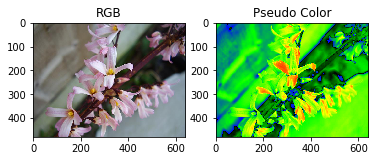

In [13]:
plt.subplot(121)
plt.imshow(src)
plt.title('RGB')
plt.subplot(122)
plt.imshow(dst)
plt.title('Pseudo Color')

参考

[1]. https://blog.csdn.net/trent1985/article/details/44916949